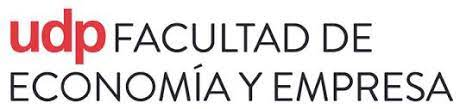



# UDP - Bussines Analytics 1
# Solemne 01


### Contenido de la clase:

### Exploratory Data Analysis de Prueba 01

### Contenido de la clase
* Aspectos Generales
* Preparación de la data

## Hacia donde vamos...
* Analítica Descriptiva:
  * Preprocessing
  * Exploratory Data Analysis
    * Análisis Univariado: distribución normal?
    * Test de comparación de médias: t-test, Chi2, KS, etc

### Instalación de la librería de estadísticas

In [1]:
# Para instalarla debes sacar el signo #
# ! pip install scipy

In [2]:
# Librerías de tratamiento de datos (las principales)
import pandas as pd
import numpy as np
import missingno as msno


# Librerías de gráficas
import matplotlib.pyplot as plt
import seaborn as sns
# complementa algunas visualizaciones
%matplotlib inline
# apply some cool styling
sns.set(color_codes=True)

# Instalación de librería estadística
from scipy import stats
from scipy.stats import norm


# Librerías de advertencias
import warnings
warnings.filterwarnings("ignore")


### Importamos la data desde nuestro Drive

1. from google.colab import drive
2. drive.mount("/content/drive")
3. Permitir acceso a nuestro Google Colab
4. link archivo


In [3]:
# from google.colab import drive
# drive.mount("/content/drive")
# df = pd.read_csv("/content/drive/MyDrive/UDP_BA01/data_store.csv",sep=",",encoding="latin-1")

# # To display the top 5 rows
# df.head(5)

In [4]:
# Cargar datos desde un repositorio de github


# Cargar datos desde un repositorio de github
# url = "https://raw.githubusercontent.com/Franciscoletelier/UDP_BA/master/data_store.csv"
# df = pd.read_csv(url,sep=",",encoding="latin-1")

# Ayuda para corregir este error
# URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:997)>
# Output is truncated. View as a scrollable element or open in a text editor. Adjust cell output settings...






In [5]:
# Data Local
df = pd.read_csv("/Users/franciscoletelier/Dropbox (Personal)/UDP/UDP_BA/data_store.csv",sep=",",encoding="latin-1")
df.sample(10)



# Data desde Github
# df = pd.read_csv("data_store.csv",sep=",",encoding="latin-1")
# df.sample(10)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7244,7245,US-2017-151127,5/22/2017,5/25/2017,First Class,RL-19615,Rob Lucas,Consumer,United States,Los Angeles,...,90049,West,OFF-AR-10002445,Office Supplies,Art,SANFORD Major Accent Highlighters,49.560,7,0.0,18.8328
829,830,CA-2017-129462,6/16/2017,6/21/2017,Second Class,JE-15745,Joel Eaton,Consumer,United States,Florence,...,41042,South,FUR-CH-10000665,Furniture,Chairs,"Global Airflow Leather Mesh Back Chair, Black",301.960,2,0.0,90.5880
3577,3578,CA-2016-103163,6/7/2016,6/11/2016,Standard Class,FM-14290,Frank Merwin,Home Office,United States,Bakersfield,...,93309,West,OFF-PA-10004000,Office Supplies,Paper,"While You Were Out Pads, 50 per Pad, 4 x 5 1/4...",4.730,1,0.0,2.3177
444,445,CA-2016-115756,9/5/2016,9/7/2016,Second Class,PK-19075,Pete Kriz,Consumer,United States,Detroit,...,48227,Central,FUR-CH-10002372,Furniture,Chairs,Office Star - Ergonomically Designed Knee Chair,242.940,3,0.0,29.1528
305,306,CA-2014-130960,12/30/2014,1/4/2015,Standard Class,KB-16600,Ken Brennan,Corporate,United States,Taylor,...,48180,Central,OFF-AR-10003651,Office Supplies,Art,Newell 350,9.840,3,0.0,2.8536
6883,6884,CA-2015-137113,12/1/2015,12/5/2015,Second Class,TW-21025,Tamara Willingham,Home Office,United States,Seattle,...,98105,West,OFF-PA-10002222,Office Supplies,Paper,"Xerox Color Copier Paper, 11"" x 17"", Ream",114.200,5,0.0,52.5320
710,711,CA-2014-113887,4/5/2014,4/7/2014,First Class,TH-21550,Tracy Hopkins,Home Office,United States,New York City,...,10035,East,OFF-PA-10004071,Office Supplies,Paper,"Eaton Premium Continuous-Feed Paper, 25% Cotto...",55.480,1,0.0,26.6304
9290,9291,CA-2014-163650,9/23/2014,9/25/2014,First Class,TT-21220,Thomas Thornton,Consumer,United States,Dover,...,19901,East,OFF-AR-10002375,Office Supplies,Art,Newell 351,9.840,3,0.0,2.8536
676,677,US-2017-119438,3/18/2017,3/23/2017,Standard Class,CD-11980,Carol Darley,Consumer,United States,Tyler,...,75701,Central,OFF-AP-10000804,Office Supplies,Appliances,Hoover Portapower Portable Vacuum,2.688,3,0.8,-7.3920
2789,2790,US-2014-117744,12/2/2014,12/6/2014,Standard Class,MD-17860,Michael Dominguez,Corporate,United States,Corpus Christi,...,78415,Central,FUR-FU-10002759,Furniture,Furnishings,12-1/2 Diameter Round Wall Clock,39.960,5,0.6,-23.9760


# Prepocesamiento de la data
## Variable Objetivo: Profit

### Eliminación de columnas innecesarías

In [6]:
# Se eliminan las columnas que no se usarán (drop)
df = df.drop(['Customer ID','Customer Name', 'Order ID', 'Country', 'Postal Code', 'Product ID'],axis=1)
df.head(5)

,Row ID,Order Date,Ship Date,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,11/8/2016,11/11/2016,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,11/8/2016,11/11/2016,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,6/12/2016,6/16/2016,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,10/11/2015,10/18/2015,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,10/11/2015,10/18/2015,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


<AxesSubplot: >

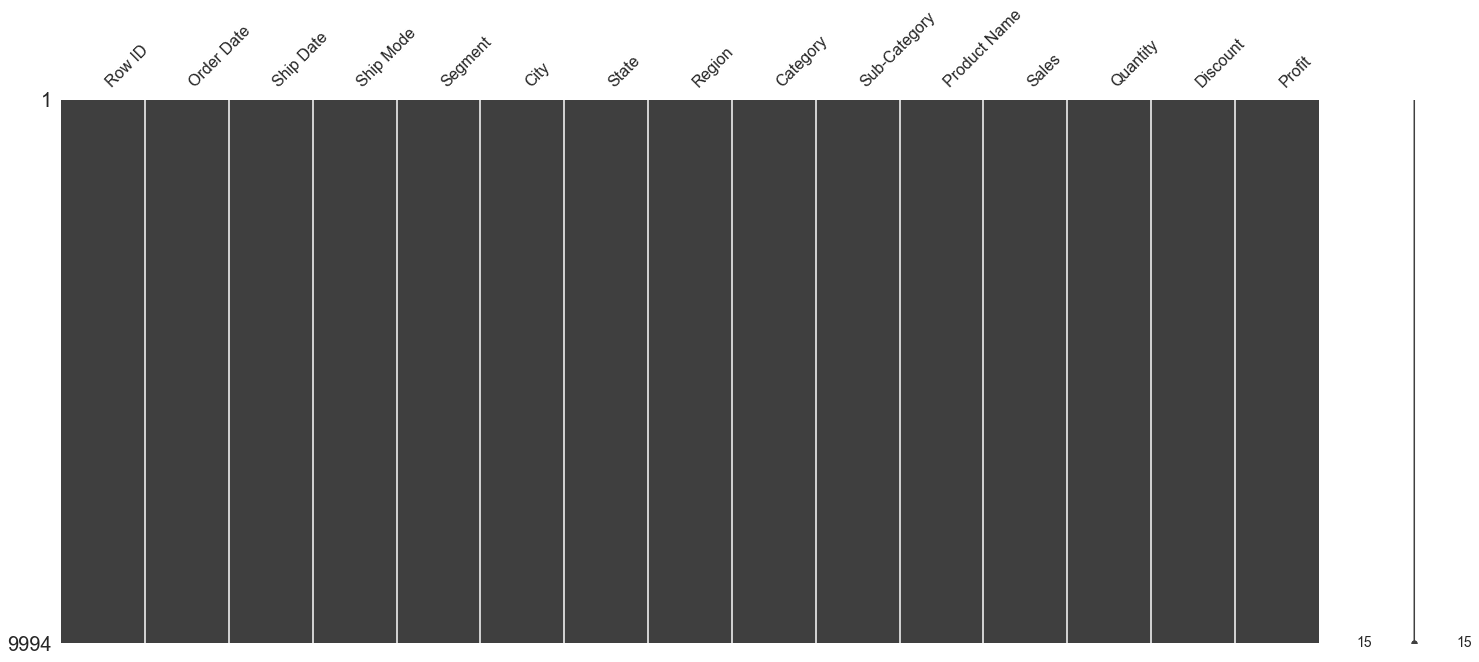

In [7]:
msno.matrix(df)

In [8]:
print(df.isnull().sum())

Row ID          0
Order Date      0
Ship Date       0
Ship Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


In [9]:
print(df.isna().sum())

Row ID          0
Order Date      0
Ship Date       0
Ship Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


In [10]:
df.shape

(9994, 15)

In [11]:
df.columns

Index(['Row ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Segment', 'City',
       'State', 'Region', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='object')

### Renombrado de columnas

In [12]:
# Renombrar columnas para facilitar el tratamiento
df.rename({'Row ID' : 'row_id',
           'Order Date' : 'order_date',
           'Ship Date' : 'ship_date',
           'Ship Mode' : 'ship_mode',
           'Segment' : 'segment',
           'City' : 'city',
           'State' : 'state',
           'Postal Code' : 'postal_code',
           'Region' : 'region',
           'Product ID' : 'product_id',
           'Category' : 'category',
           'Sub-Category' : 'subcategory',
           'Product Name' : 'product_name',
           'Sales' : 'sales',
           'Quantity' : 'quantity',
           'Discount' : 'discount',
           'Profit' : 'profit'
           },  axis="columns", inplace=True)
df.columns

df.sample(10)

,row_id,order_date,ship_date,ship_mode,segment,city,state,region,category,subcategory,product_name,sales,quantity,discount,profit
7992,7993,6/14/2016,6/17/2016,First Class,Consumer,Boca Raton,Florida,South,Technology,Accessories,"Verbatim Slim CD and DVD Storage Cases, 50/Pack",18.464,2,0.20,2.3080
7186,7187,8/17/2017,8/24/2017,Standard Class,Home Office,Houston,Texas,Central,Furniture,Chairs,SAFCO Optional Arm Kit for Workspace Cribbage ...,74.592,4,0.30,-2.1312
1285,1286,6/26/2016,7/3/2016,Standard Class,Consumer,Providence,Rhode Island,East,Office Supplies,Storage,Woodgrain Magazine Files by Perma,14.900,5,0.00,1.0430
3351,3352,9/23/2014,9/28/2014,Standard Class,Corporate,San Diego,California,West,Furniture,Bookcases,"Rush Hierlooms Collection 1"" Thick Stackable B...",435.999,3,0.15,20.5176
93,94,1/31/2015,2/5/2015,Second Class,Consumer,Minneapolis,Minnesota,Central,Furniture,Furnishings,"Seth Thomas 13 1/2"" Wall Clock",53.340,3,0.00,16.5354
6183,6184,9/21/2015,9/26/2015,Standard Class,Consumer,Columbia,South Carolina,South,Office Supplies,Storage,"Stur-D-Stor Shelving, Vertical 5-Shelf: 72""H x...",887.840,8,0.00,17.7568
6063,6064,12/25/2015,12/30/2015,Second Class,Consumer,San Diego,California,West,Office Supplies,Paper,"Important Message Pads, 50 4-1/4 x 5-1/2 Forms...",12.600,3,0.00,6.1740
4498,4499,11/21/2014,11/26/2014,Standard Class,Corporate,San Francisco,California,West,Office Supplies,Paper,Xerox 211,12.960,2,0.00,6.2208
9457,9458,5/27/2017,6/3/2017,Standard Class,Corporate,Greensboro,North Carolina,South,Office Supplies,Binders,"Fellowes Twister Kit, Gray/Clear, 3/pkg",12.060,5,0.70,-10.0500
3330,3331,11/11/2014,11/15/2014,Standard Class,Consumer,Houston,Texas,Central,Technology,Phones,Classic Ivory Antique Telephone ZL1810,241.176,3,0.20,15.0735


In [13]:
df.ship_mode.value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: ship_mode, dtype: int64

In [14]:
# Se eliminan los duplicados si es que existen
df = df.drop_duplicates()
df.shape

(9994, 15)

In [15]:
# Se cambia de tipo de dato int a string para evitar incurrir en errores de análisis cuantitativos
df['row_id'] = df['row_id'].astype(str)

In [16]:
# Cuantos datos hay por cada columna?
#df.count()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   row_id        9994 non-null   object 
 1   order_date    9994 non-null   object 
 2   ship_date     9994 non-null   object 
 3   ship_mode     9994 non-null   object 
 4   segment       9994 non-null   object 
 5   city          9994 non-null   object 
 6   state         9994 non-null   object 
 7   region        9994 non-null   object 
 8   category      9994 non-null   object 
 9   subcategory   9994 non-null   object 
 10  product_name  9994 non-null   object 
 11  sales         9994 non-null   float64
 12  quantity      9994 non-null   int64  
 13  discount      9994 non-null   float64
 14  profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(11)
memory usage: 1.2+ MB


In [17]:
df.describe()

,sales,quantity,discount,profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


## Detección de outliers

<AxesSubplot: xlabel='sales'>

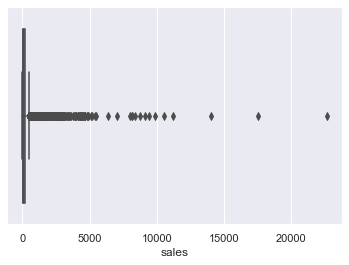

In [18]:
# boxplot Sales
sns.boxplot(x=df['sales'])

In [19]:
# # Se calculas los Cuantiles del df
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# # Que calculamos acá?
# IQR = Q3 - Q1
# print(IQR)

In [20]:
# # Que estamos calculando acá? Si ya calculamos los Q1 y Q3?
# df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
# df.shape

<AxesSubplot: xlabel='sales'>

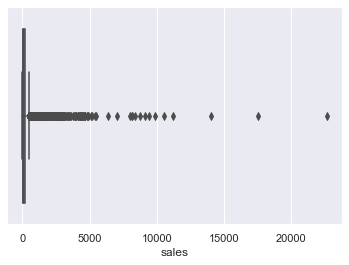

In [21]:
sns.boxplot(x=df['sales'])

<AxesSubplot: xlabel='quantity'>

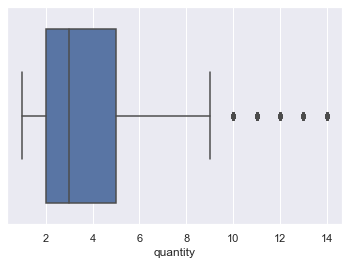

In [22]:
sns.boxplot(x=df['quantity'])

<AxesSubplot: xlabel='profit'>

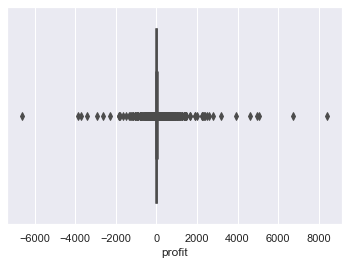

In [23]:
sns.boxplot(x=df.profit)

### Revisamos algunas distribuciones de variables

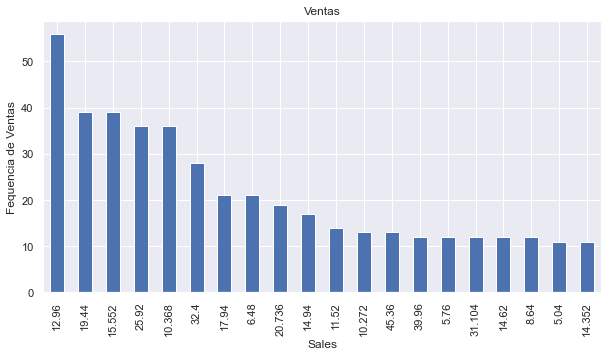

In [24]:
df.sales.value_counts().nlargest(20).plot(kind='bar', figsize=(10,5))
plt.title("Ventas")
plt.ylabel('Fequencia de Ventas')
plt.xlabel('Sales');

,sales,quantity,discount,profit
sales,1.000000,0.200795,-0.028190,0.479064
quantity,0.200795,1.000000,0.008623,0.066253
discount,-0.028190,0.008623,1.000000,-0.219487
profit,0.479064,0.066253,-0.219487,1.000000


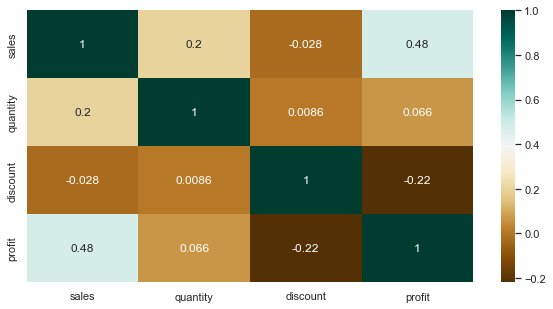

In [25]:
# Coeficiente de correlación
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

# Ingeniería de Atributos (Feature Engineering)
## Segmentación de las ventas

### Asignación de segmentos
1. Vamos a asignar una categoría según el valor de las ventas/profit
2. Vamos a crear una nueva columna llamada "Segmento"
3. A través de un ciclo for y el uso de ifelse vamos a asignar la categoría

In [26]:
# Calcula el promedio de sales y profit
prom_sales = df.sales.mean()
prom_profit = df.profit.mean()

# Crea una lista para almacenar los segmentos
segmento = []

# Itera a través de las filas del DataFrame
for index, row in df.iterrows():
    if row['sales'] < prom_sales and row['profit'] < prom_profit:
        segmento.append('bajo_bajo')
    elif row['sales'] < prom_sales and row['profit'] > prom_profit:
        segmento.append('bajo_alto')
    elif row['sales'] > prom_sales and row['profit'] < prom_profit:
        segmento.append('alto_bajo')
    elif row['sales'] > prom_sales and row['profit'] > prom_profit:
        segmento.append('alto_alto')
    else:
        segmento.append('otros')  # Manejo de casos que no cumplen ninguna condición

# Agrega la columna 'segmento' al DataFrame
df['segmento'] = segmento
df.sample(10)

,row_id,order_date,ship_date,ship_mode,segment,city,state,region,category,subcategory,product_name,sales,quantity,discount,profit,segmento
9720,9721,9/22/2016,9/26/2016,Standard Class,Corporate,Green Bay,Wisconsin,Central,Furniture,Furnishings,"DAX Two-Tone Rosewood/Black Document Frame, De...",18.960,2,0.0,7.5840,bajo_bajo
3215,3216,7/8/2017,7/10/2017,First Class,Consumer,San Mateo,California,West,Office Supplies,Labels,Avery 485,75.180,6,0.0,35.3346,bajo_alto
4676,4677,3/14/2014,3/19/2014,Standard Class,Consumer,Logan,Utah,West,Office Supplies,Binders,GBC Wire Binding Combs,33.088,4,0.2,11.1672,bajo_bajo
8899,8900,8/7/2015,8/9/2015,Second Class,Corporate,Springfield,Virginia,South,Office Supplies,Labels,Avery 50,25.060,2,0.0,11.7782,bajo_bajo
9803,9804,7/18/2015,7/20/2015,Second Class,Consumer,New York City,New York,East,Technology,Phones,"Plantronics CS 50-USB - headset - Convertible,...",135.990,1,0.0,36.7173,bajo_alto
1127,1128,3/2/2015,3/7/2015,Standard Class,Home Office,Richmond,Indiana,Central,Office Supplies,Art,50 Colored Long Pencils,10.160,1,0.0,2.6416,bajo_bajo
5068,5069,8/8/2014,8/12/2014,Standard Class,Home Office,Trenton,Michigan,Central,Technology,Copiers,Sharp 1540cs Digital Laser Copier,549.990,1,0.0,274.9950,alto_alto
7790,7791,9/19/2017,9/19/2017,Same Day,Home Office,Philadelphia,Pennsylvania,East,Office Supplies,Binders,"Acco PRESSTEX Data Binder with Storage Hooks, ...",4.842,3,0.7,-3.3894,bajo_bajo
9863,9864,1/14/2017,1/20/2017,Standard Class,Home Office,Richmond,Indiana,Central,Office Supplies,Paper,Xerox 188,11.340,1,0.0,5.5566,bajo_bajo
2851,2852,12/17/2017,12/22/2017,Standard Class,Home Office,Columbus,Indiana,Central,Office Supplies,Paper,"Wirebound Message Books, 2 7/8"" x 5"", 3 Forms ...",28.160,4,0.0,13.2352,bajo_bajo


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


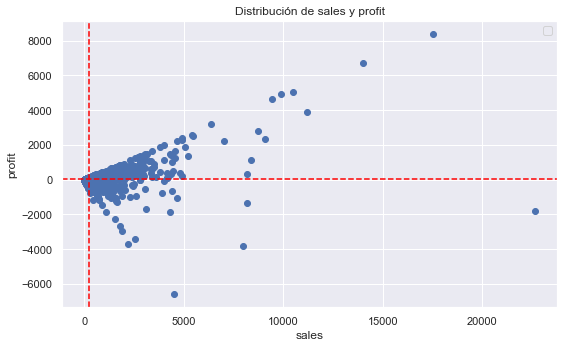

In [27]:
# Scatter plot para visualizar datos numéricos
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(df['sales'], df['profit'])

plt.axvline(x=prom_sales, color='red', linestyle='--', linewidth=1.5)
plt.axhline(y=prom_profit, color='red', linestyle='--', linewidth=1.5)

plt.title('Distribución de sales y profit')

ax.set_xlabel('sales')
ax.set_ylabel('profit')

plt.legend()
plt.tight_layout();
plt.show();

## Calculamos el profit en porcentaje

In [89]:
df['porcentaje_profit'] = df['profit']/df['sales']
df.porcentaje_profit.sample(10)

6123    0.325000
9116    0.200000
2179    0.362500
5545    0.260000
6228   -0.183333
1863   -0.640000
9044    0.375000
6332    0.330000
5193    0.470000
3636    0.337500
Name: porcentaje_profit, dtype: float64

In [90]:
df.head(5)

,row_id,order_date,ship_date,ship_mode,segment,city,state,region,category,subcategory,product_name,sales,quantity,discount,profit,segmento,porcentaje_profit
0,1,11/8/2016,11/11/2016,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,alto_alto,0.1600
1,2,11/8/2016,11/11/2016,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,alto_alto,0.3000
2,3,6/12/2016,6/16/2016,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,bajo_bajo,0.4700
3,4,10/11/2015,10/18/2015,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,alto_bajo,-0.4000
4,5,10/11/2015,10/18/2015,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,bajo_bajo,0.1125


### Uso de tablas de contingencia

## Uso de tablas de contingencia con Pandas

In [91]:
# Ejemplos
# Agrupar por variables más grandes para tener una visión más amplia
table_region = pd.crosstab(index=df.region, columns=df.ship_mode)
table_region

ship_mode,First Class,Same Day,Second Class,Standard Class
region,,,,
Central,299,120,465,1439
East,490,155,530,1673
South,234,83,329,974
West,515,185,621,1882


In [92]:
# Agrupar por variables más grandes para tener una visión más amplia
table_region = pd.crosstab(index=df.region, columns=df.segmento, margins=True, margins_name="Total")
table_region

segmento,alto_alto,alto_bajo,bajo_alto,bajo_bajo,Total
region,,,,,
Central,318,211,181,1613,2323
East,421,255,294,1878,2848
South,279,108,175,1058,1620
West,517,251,366,2069,3203
Total,1535,825,1016,6618,9994


## Análisis Univariado
* Analizar los tipos de distribución de las variables numéricas.
* Use estadística descriptiva
* Probar distribución normal. Investigar los test y scripts para desarrollar esto.
* Recomiendo revisar la librería Scipy y los gráficos de distribución de Seaborn y Matplotlib
  * Link: https://scipy.org/
* Investigar sobre los test de normalidad y su implementación en Python
  * Link: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html
* Investigar sobre pruebas para variables categoricas y su implementación en Python
  * Link: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html
* Investigar sobre pruebas para variables numéricas (t-test) y su implementación en Python
  * Link: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

# Análisis de Componentes Principales (PCA)

In [93]:
import numpy as np
import matplotlib.pyplot as plt

class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
    
    def fit(self, X):
        # Center data
        self.mean = np.mean(X, axis=0)
        X = X - self.mean

        # Cálculo de la matriz de covarianza
        cov = np.cov(X, rowvar=False)

        # Cálculo de los autovalores y autovectores
        eigenvalues, eigenvectors = np.linalg.eigh(cov)
        # Ordenar los autovectores de mayor a menor
        idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:,idx]

        # Seleccionar los n_components eigenvectors como componentes principales
        self.components = eigenvectors[:,:self.n_components]

        # Calcular y almacenar los autovalores en la instancia
        self.explained_variance_ = eigenvalues[:self.n_components]

    def transform(self, X):
        # Proyectar los datos en el nuevo espacio
        X = X - self.mean
        X_transformed = np.dot(X, self.components)
        return X_transformed
    

In [94]:
# Creación de la instancia PCA
pca = PCA(n_components=2)
pca.fit(df[['sales', 'profit']].values)
X_pca = pca.transform(df[['sales', 'profit']].values)
print(X_pca.shape)

(9994, 2)


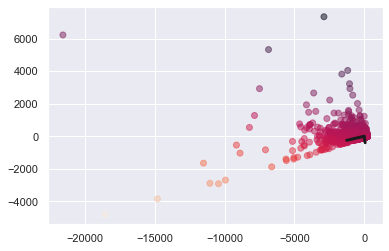

In [95]:
# Visualización de los datos transformados
plot = plt.scatter(X_pca[:,0], X_pca[:,1], c=df['profit'], alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components.T):
    v = vector * 2 * np.sqrt(length)
    plot = plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)

plt.show()

In [96]:
# Crear un DataFrame con las componentes principales
# pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])

# Agregar otras columnas necesarias del DataFrame original si es necesario
# pca_df['sales'] = df['sales']
# pca_df['profit'] = df['profit']
# pca_df['segmento'] = df['segmento']

# Ahora, 'pca_df' es un nuevo DataFrame que contiene las componentes principales junto con otras columnas relevantes.

# Finanzas (2ptos)
### Que ciudades son las que tiene mejor Profit
1. Rentabilidad entre categorías. Evidencia estadística
2. Rentabilidad entre segmentos. Hay diferencia estadística

In [97]:
# 1. Rentabilidad entre categorías
# Buscamos a través de un pivot_table la rentabilidad por categoría
tabla_profit_categoria = pd.pivot_table(df, values=['porcentaje_profit'], index=['category'], aggfunc=['mean','median','std'], margins=True, margins_name="Total").round(2)
tabla_profit_categoria

,mean,median,std
,porcentaje_profit,porcentaje_profit,porcentaje_profit
category,,,
Furniture,0.04,0.11,0.34
Office Supplies,0.14,0.32,0.55
Technology,0.16,0.18,0.23
Total,0.12,0.27,0.47


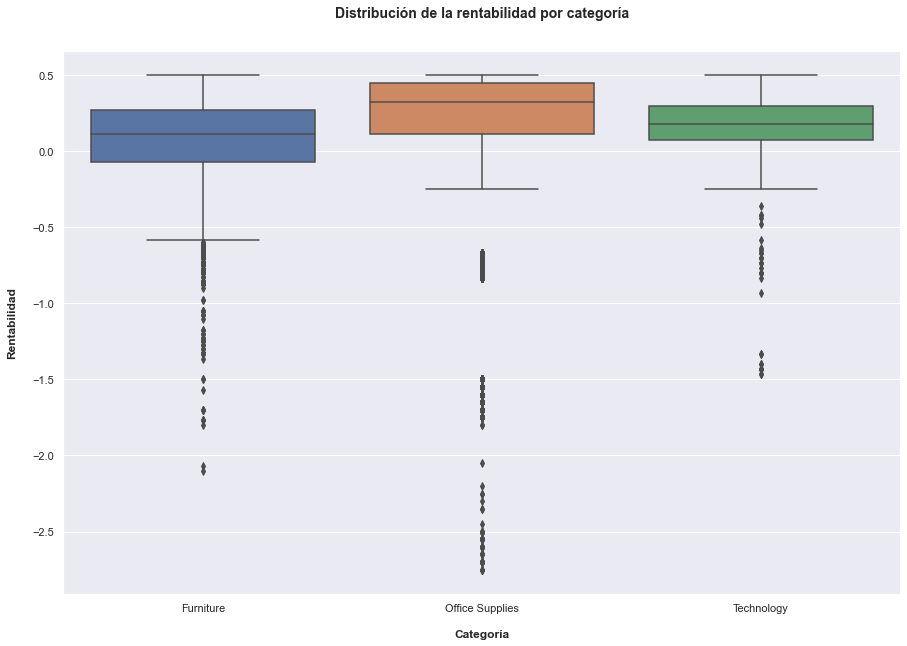

In [98]:
# Como ya generamos una columna con el porcentaje de profit, podemos usarla para crear un subset de datos que nos permita visualizar la rentabilidad por categoría
tmp_rent_categoria = df[['category','porcentaje_profit']]
# Visualizamos la distribución de la rentabilidad por categoría
plt.figure(figsize=(15,10))
sns.boxplot(x=tmp_rent_categoria['category'], y=tmp_rent_categoria['porcentaje_profit'], data=tmp_rent_categoria)
plt.title('Distribución de la rentabilidad por categoría', fontsize=14, fontweight='bold', y=1.05)
plt.xlabel('Categoría', fontsize=12, labelpad=15, fontweight='bold')
plt.ylabel('Rentabilidad', fontsize=12, labelpad=15, fontweight='bold')
plt.xticks(rotation=0)
plt.show()

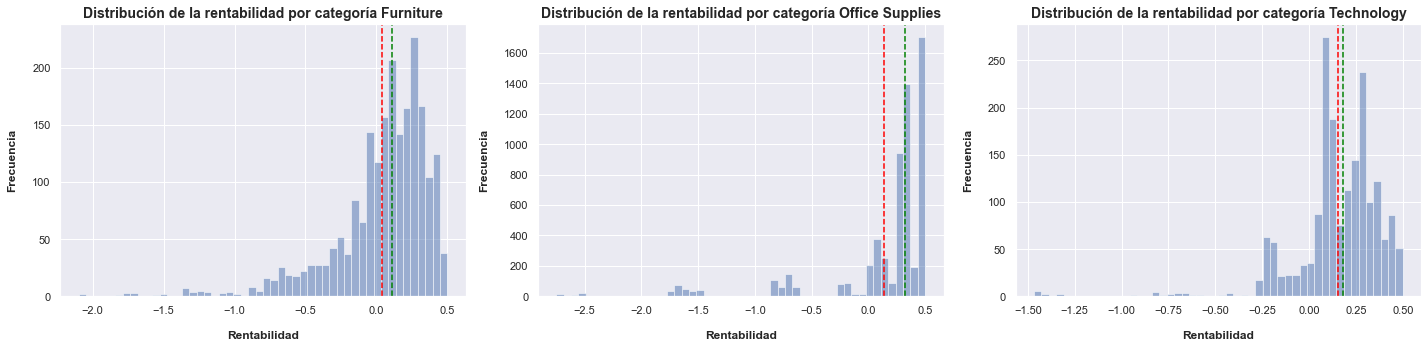

In [99]:
# La otra opción es visualizar las distribuciones de las rentabilidades por categoría en gráficos distintos, a través de un histograma de matplotlib a través de un subplot de matplotlib, iterando por cada categoría a través de un for
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.hist(tmp_rent_categoria[tmp_rent_categoria['category']=='Furniture']['porcentaje_profit'], bins=50, alpha=0.5, label='Furniture')
plt.title('Distribución de la rentabilidad por categoría Furniture', fontsize=14, fontweight='bold')
plt.xlabel('Rentabilidad', fontsize=12, labelpad=15, fontweight='bold')
plt.ylabel('Frecuencia', fontsize=12, labelpad=15, fontweight='bold')
# Incluir la media y la mediana en el gráfico a través de líneas verticales
plt.axvline(tmp_rent_categoria[tmp_rent_categoria['category']=='Furniture']['porcentaje_profit'].mean(), color='red', linestyle='--', linewidth=1.5)
plt.axvline(tmp_rent_categoria[tmp_rent_categoria['category']=='Furniture']['porcentaje_profit'].median(), color='green', linestyle='--', linewidth=1.5)



plt.subplot(1,3,2)
plt.hist(tmp_rent_categoria[tmp_rent_categoria['category']=='Office Supplies']['porcentaje_profit'], bins=50, alpha=0.5, label='Office Supplies')
plt.title('Distribución de la rentabilidad por categoría Office Supplies', fontsize=14, fontweight='bold')
plt.xlabel('Rentabilidad', fontsize=12, labelpad=15, fontweight='bold')
plt.ylabel('Frecuencia', fontsize=12, labelpad=15, fontweight='bold')
# Incluir la media y la mediana en el gráfico a través de líneas verticales
plt.axvline(tmp_rent_categoria[tmp_rent_categoria['category']=='Office Supplies']['porcentaje_profit'].mean(), color='red', linestyle='--', linewidth=1.5)
plt.axvline(tmp_rent_categoria[tmp_rent_categoria['category']=='Office Supplies']['porcentaje_profit'].median(), color='green', linestyle='--', linewidth=1.5)


plt.subplot(1,3,3)
plt.hist(tmp_rent_categoria[tmp_rent_categoria['category']=='Technology']['porcentaje_profit'], bins=50, alpha=0.5, label='Technology')
plt.title('Distribución de la rentabilidad por categoría Technology', fontsize=14, fontweight='bold')
plt.xlabel('Rentabilidad', fontsize=12, labelpad=15, fontweight='bold')
plt.ylabel('Frecuencia', fontsize=12, labelpad=15, fontweight='bold')
# Incluir la media y la mediana en el gráfico a través de líneas verticales
plt.axvline(tmp_rent_categoria[tmp_rent_categoria['category']=='Technology']['porcentaje_profit'].mean(), color='red', linestyle='--', linewidth=1.5)
plt.axvline(tmp_rent_categoria[tmp_rent_categoria['category']=='Technology']['porcentaje_profit'].median(), color='green', linestyle='--', linewidth=1.5)



plt.xticks(rotation=0)
plt.tight_layout()
plt.show();


### Probaremos si hay diferencia estadística entre las categorías de productos
* H0: No hay diferencia estadística entre las categorías de productos
* H1: Existe diferencia estadística entre las categorías de productos

In [100]:
# Debemos testear si hay normalidad en la distribución de las rentabilidades por categoría, para ello usamos el test de Shapiro-Wilk
# H0: La distribución es normal
# H1: La distribución no es normal

# Test de Shapiro-Wilk
# Furniture
stat, p = stats.shapiro(tmp_rent_categoria[tmp_rent_categoria['category']=='Furniture']['porcentaje_profit'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpretación
alpha = 0.05
if p > alpha:
    print('La distribución de la rentabilidad de la categoría Furniture parece normal (no se rechaza H0)')
else:
    print('La distribución de la rentabilidad de la categoría Furniture NO parece normal (se rechaza H0)')

# Office Supplies
stat, p = stats.shapiro(tmp_rent_categoria[tmp_rent_categoria['category']=='Office Supplies']['porcentaje_profit'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpretación
alpha = 0.05
if p > alpha:
    print('La distribución de la rentabilidad de la categoría Office Supplies parece normal (no se rechaza H0)')
else:
    print('La distribución de la rentabilidad de la categoría Office Supplies NO parece normal (se rechaza H0)')

# Technology
stat, p = stats.shapiro(tmp_rent_categoria[tmp_rent_categoria['category']=='Technology']['porcentaje_profit'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpretación
alpha = 0.05
if p > alpha:
    print('La distribución de la rentabilidad de la categoría Technology parece normal (no se rechaza H0)')
else:
    print('La distribución de la rentabilidad de la categoría Technology NO parece normal (se rechaza H0)')


Statistics=0.851, p=0.000
La distribución de la rentabilidad de la categoría Furniture NO parece normal (se rechaza H0)
Statistics=0.612, p=0.000
La distribución de la rentabilidad de la categoría Office Supplies NO parece normal (se rechaza H0)
Statistics=0.831, p=0.000
La distribución de la rentabilidad de la categoría Technology NO parece normal (se rechaza H0)


### Transformación de la data:
* Sólo ejemplo y para practicar el código pondremos en práctica algunas transformaciones
* Recuerden que deben hacerlo para todas las variables numéricas

In [101]:
# Creamos una nueva columna con la transformación logarítmica de la rentabilidad en nuestro subset de datos
tmp_rent_categoria['log_rentabilidad'] = np.log(tmp_rent_categoria['porcentaje_profit'])
tmp_rent_categoria.head(5)

,category,porcentaje_profit,log_rentabilidad
0,Furniture,0.1600,-1.832581
1,Furniture,0.3000,-1.203973
2,Office Supplies,0.4700,-0.755023
3,Furniture,-0.4000,NaN
4,Office Supplies,0.1125,-2.184802


# y que hacemos con los valores NAN?

### Normalización de la data: MinMaxScaler
* La normalización es un proceso para escalar los valores numéricos en un rango específico, como [0, 1], mientras mantiene la distribución de los datos.
* Uno de los métodos más comunes para normalizar datos es el método Min-Max, que utiliza la fórmula siguiente:
$X = (X - X.min / (X.max - X.min)$
* Link: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html


In [103]:
# Vamos a implementar una transformación MinMaxScaler para normalizar los datos de la rentabilidad.
# Primero lo haremos paso a paso, para luego implementar una función que nos permita hacerlo de manera automática
# Calculamos el mínimo y el máximo de la rentabilidad
minimo = tmp_rent_categoria['log_rentabilidad'].min()
maximo = tmp_rent_categoria['log_rentabilidad'].max()
print('Mínimo: ', minimo)
print('Máximo: ', maximo)

# Calculamos el rango de la rentabilidad
rango = maximo - minimo
print('Rango: ', rango)

Mínimo:  -inf
Máximo:  -0.6931471805599453
Rango:  inf


In [104]:
# Calculamos la rentabilidad normalizada
tmp_rent_categoria['rentabilidad_minmax_normalizada'] = (tmp_rent_categoria['log_rentabilidad'] - minimo) / rango
tmp_rent_categoria.head(5)


,category,porcentaje_profit,log_rentabilidad,rentabilidad_minmax_normalizada
0,Furniture,0.1600,-1.832581,NaN
1,Furniture,0.3000,-1.203973,NaN
2,Office Supplies,0.4700,-0.755023,NaN
3,Furniture,-0.4000,NaN,NaN
4,Office Supplies,0.1125,-2.184802,NaN


In [105]:
# Vamos a implementar una función que nos permita hacer la transformación MinMaxScaler de manera automática
def minmax_scaler(dataframe, columna):
    minimo = dataframe[columna].min()
    maximo = dataframe[columna].max()
    rango = maximo - minimo
    dataframe[columna + '_minmax_normalizada'] = (dataframe[columna] - minimo) / rango
    return dataframe

# Aplicamos la función a nuestro subset de datos
minmax_scaler(tmp_rent_categoria, 'log_rentabilidad')
tmp_rent_categoria.head(5)


,category,porcentaje_profit,log_rentabilidad,rentabilidad_minmax_normalizada,log_rentabilidad_minmax_normalizada
0,Furniture,0.1600,-1.832581,NaN,NaN
1,Furniture,0.3000,-1.203973,NaN,NaN
2,Office Supplies,0.4700,-0.755023,NaN,NaN
3,Furniture,-0.4000,NaN,NaN,NaN
4,Office Supplies,0.1125,-2.184802,NaN,NaN


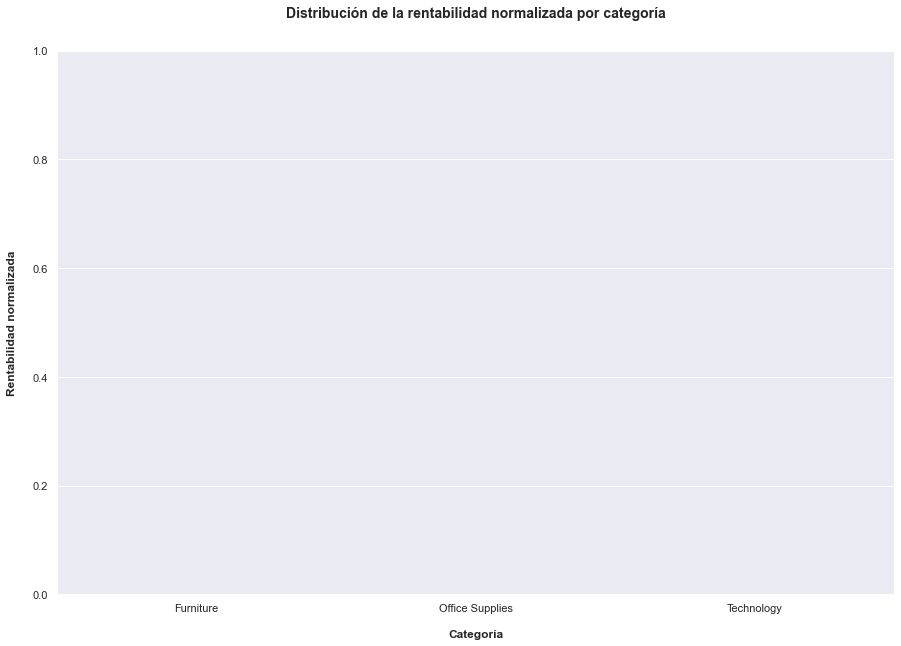

In [106]:
# Visualizamos la distribución de la rentabilidad normalizada
plt.figure(figsize=(15,10))
sns.boxplot(x=tmp_rent_categoria['category'], y=tmp_rent_categoria['rentabilidad_minmax_normalizada'], data=tmp_rent_categoria)
plt.title('Distribución de la rentabilidad normalizada por categoría', fontsize=14, fontweight='bold', y=1.05)
plt.xlabel('Categoría', fontsize=12, labelpad=15, fontweight='bold')
plt.ylabel('Rentabilidad normalizada', fontsize=12, labelpad=15, fontweight='bold')
plt.xticks(rotation=0)
plt.show()

In [107]:
# Vamos a implementar una función que nos permita hacer la transformación StandardScaler de manera automática
def standard_scaler(dataframe, columna):
    media = dataframe[columna].mean()
    desviacion = dataframe[columna].std()
    dataframe[columna + '_standard_normalizada'] = (dataframe[columna] - media) / desviacion
    return dataframe

# Aplicamos la función a nuestro subset de datos
standard_scaler(tmp_rent_categoria, 'log_rentabilidad')
tmp_rent_categoria.head(5)

,category,porcentaje_profit,log_rentabilidad,rentabilidad_minmax_normalizada,log_rentabilidad_minmax_normalizada,log_rentabilidad_standard_normalizada
0,Furniture,0.1600,-1.832581,NaN,NaN,NaN
1,Furniture,0.3000,-1.203973,NaN,NaN,NaN
2,Office Supplies,0.4700,-0.755023,NaN,NaN,NaN
3,Furniture,-0.4000,NaN,NaN,NaN,NaN
4,Office Supplies,0.1125,-2.184802,NaN,NaN,NaN


In [108]:
# Como los datos no son normales, usamos el test de Levene para testear la igualdad de varianzas
# H0: Las varianzas son iguales
# H1: Las varianzas no son iguales

# Test de Levene
stat, p = stats.levene(tmp_rent_categoria[tmp_rent_categoria['category']=='Furniture']['log_rentabilidad'], 
                       tmp_rent_categoria[tmp_rent_categoria['category']=='Office Supplies']['log_rentabilidad'],
                       tmp_rent_categoria[tmp_rent_categoria['category']=='Technology']['log_rentabilidad'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpretación
alpha = 0.05
if p > alpha:
    print('Las varianzas parecen iguales (no se rechaza H0)')
else:
    print('Las varianzas NO parecen iguales (se rechaza H0)')

# Como las varianzas no son iguales, usamos el test de Welch para testear la igualdad de medias
# H0: Las medias son iguales
# H1: Las medias no son iguales

# Test de Welch
stat, p = stats.ttest_ind(tmp_rent_categoria[tmp_rent_categoria['category']=='Furniture']['log_rentabilidad'], 
                       tmp_rent_categoria[tmp_rent_categoria['category']=='Office Supplies']['log_rentabilidad'],
                       equal_var=False)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpretación
alpha = 0.05
if p > alpha:
    print('Las medias parecen iguales (no se rechaza H0)')
else:
    print('Las medias NO parecen iguales (se rechaza H0)')


Statistics=nan, p=nan
Las varianzas NO parecen iguales (se rechaza H0)
Statistics=nan, p=nan
Las medias NO parecen iguales (se rechaza H0)


# Operaciones (2ptos)
### Cuales son los state que tiene mayor nivel de ventas
1. A que estados estamos enviando más? Evidencia estadística
2. Diferencia entre segmentos. Hay diferencia estadística


# Comercial (2ptos)
## Cuales son las categorías de productos más rentables
1. Hay diferencias entre categorías? (estadística)
2. En que estados se presentan estas diferencias
3. En que categorías se detectaron los mayores descuentos

# Conclusiones (3ptos)
***ATENCIÓN***
* Las conclusiones deben incluír las métricas investigadas en los análisis que se realizaron
* Se probará su script para que el código sea reproducible

1. Que conclusiones podemos sacar de este análisis?
2. Que recomendaciones podemos dar a la empresa?
3. Que análisis adicionales podemos hacer?